Desplazamientos: 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.005,0.006,0.004,0.007,0.005,0.005,0.004,0.006,0.001,0.002,0.000,0.003,0.003
1,0.004,0.005,0.003,0.006,0.004,0.004,0.003,0.005,0.001,0.001,0.000,0.002,0.001
2,0.002,0.000,0.005,-0.004,0.002,0.000,0.004,-0.003,0.002,-0.001,0.005,-0.004,0.000
3,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.001,0.000
4,0.000,0.000,-0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,-0.001,0.001,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.006,0.003,0.011,-0.001,0.006,0.003,0.009,0.000,0.003,-0.001,0.007,-0.005,0.004
128,0.007,0.003,0.012,-0.002,0.006,0.003,0.010,-0.001,0.003,-0.001,0.009,-0.006,0.004
129,0.008,0.002,0.014,-0.004,0.007,0.003,0.011,-0.002,0.004,-0.001,0.010,-0.008,0.004
130,0.008,0.002,0.016,-0.005,0.007,0.002,0.013,-0.003,0.004,-0.002,0.012,-0.009,0.004



 Valores de qs: 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.5,9.0,6.0,10.5,7.5,7.5,6.0,9.0,1.5,3.0,0.0,4.5,4.5
1,6.0,7.5,4.5,9.0,6.0,6.0,4.5,7.5,1.5,1.5,0.0,3.0,1.5
2,3.0,0.0,7.5,-6.0,3.0,0.0,6.0,-4.5,3.0,-1.5,7.5,-6.0,0.0
3,0.0,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0,0.0,0.0,1.5,0.0
4,0.0,0.0,-1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,-1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,9.0,4.5,16.5,-1.5,9.0,4.5,13.5,0.0,4.5,-1.5,10.5,-7.5,6.0
128,10.5,4.5,18.0,-3.0,9.0,4.5,15.0,-1.5,4.5,-1.5,13.5,-9.0,6.0
129,12.0,3.0,21.0,-6.0,10.5,4.5,16.5,-3.0,6.0,-1.5,15.0,-12.0,6.0
130,12.0,3.0,24.0,-7.5,10.5,3.0,19.5,-4.5,6.0,-3.0,18.0,-13.5,6.0


Desplazamientos por nodo


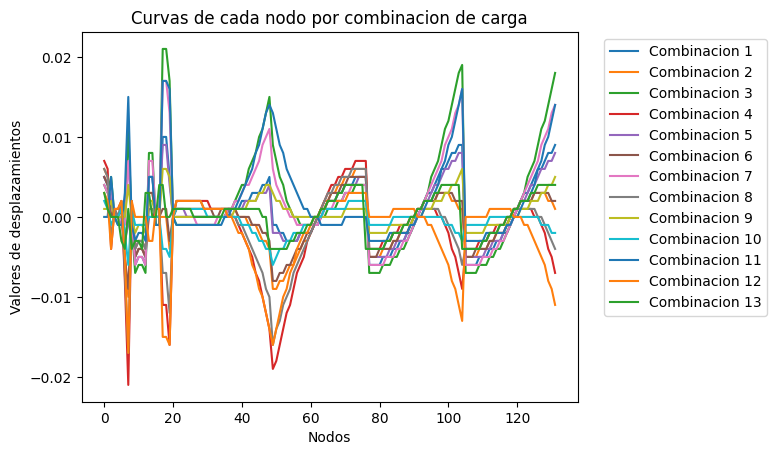


Valores de qs


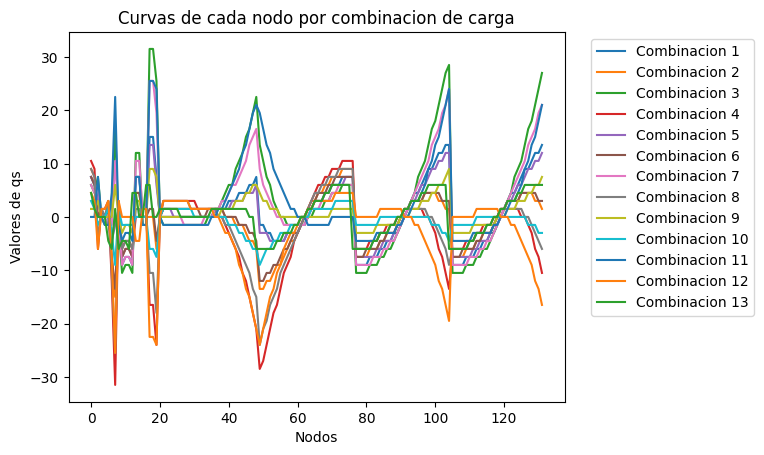

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#Variables
B = 1500          # [T/m^3]
qa = 15           # [T/m^2]
comb = 13
nodes = 232

#Importación de datos
Uxyz = pd.read_excel(r'C:\Users\USUARIO\Desktop\Python\Jupyter\Cimentaciones\Cimentaciones\Datos_exportados_Robot.xlsx', sheet_name='Hoja1')
Uz = Uxyz.iloc[1:, 4].values.astype(float)
n = (len(Uz) // comb) * comb
Uz = Uz[:n]
#print(Uz.shape)

n_filas_D = len(Uz) // comb
n_columnas_D = comb
D = np.empty((n_filas_D, n_columnas_D))
qs = np.empty((n_filas_D, n_columnas_D))
#print(D.shape)

for j in range(0, comb):
    D[:,j] = Uz[j::comb]
    qs[:,j] = D[:,j]*1500 #balasto = 1500 T/m3

df_D = pd.DataFrame(D)
df_qs = pd.DataFrame(qs)
print('Desplazamientos: ')
display(df_D)
print(f'\n Valores de qs: ')
display(df_qs)


#Create plot

print('Desplazamientos por nodo')
fig, ax = plt.subplots()

for i in range(0, comb):
    ax.plot(D[:, i], label=f"Combinacion {i+1}")


# Add the legend outside the graph
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de desplazamientos")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()

print(f'\nValores de qs')
fig, ax = plt.subplots()

for i in range(0, comb):
    ax.plot(qs[:, i], label=f"Combinacion {i+1}")


# Add the legend outside the graph
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax.set_xlabel("Nodos")
ax.set_ylabel("Valores de qs")
ax.set_title("Curvas de cada nodo por combinacion de carga")
plt.show()
